# I. Import Dataset

In [11]:
import pandas as pd

# Load the data
file_path = r'D:\GitHub\UEL-Course\Social Media Analytics\Data\post_info.csv'
data = pd.read_csv(file_path)
df = data.copy()
# Display the first few rows to understand its structure and contents
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         77 non-null     object
 1   Content      77 non-null     object
 2   Like Num     77 non-null     object
 3   Comment Num  77 non-null     object
 4   Share Num    77 non-null     object
 5   URL          77 non-null     object
dtypes: object(6)
memory usage: 3.7+ KB


(                Time                                            Content  \
 0  12 March at 19:00   LIPOVITAN TONGKAT ALI – NƯỚC TĂNG LỰC MẬT NHÂ...   
 1         9 February   TẾT RỒNG PHÚC QUÝ – NĂNG LƯỢNG NHƯ Ý \nKhoảnh...   
 2         5 February   CHUYẾN XE NĂNG LƯỢNG 0 ĐỒNG CÙNG BÀ CON VỀ QU...   
 3         25 January  LIPOVITAN x HONDA BIKER RALLY: SỰ KIỆN BÙNG NỔ...   
 4          9 January   CÔNG BỐ DANH SÁCH HƠN 600 KHÁCH HÀNG NHẬN ĐƯỢ...   
 
   Like Num  Comment Num  Share Num  \
 0      109  14 comments  33 shares   
 1       53    1 comment   3 shares   
 2      148  35 comments  38 shares   
 3       84  22 comments  14 shares   
 4      130  46 comments  18 shares   
 
                                                  URL  
 0  https://www.facebook.com/Lipovitan.vn/posts/pf...  
 1  https://www.facebook.com/Lipovitan.vn/posts/pf...  
 2  https://www.facebook.com/Lipovitan.vn/posts/pf...  
 3  https://www.facebook.com/Lipovitan.vn/posts/pf...  
 4  https://www.facebook.c

In [12]:
# Convert 'Like Num', 'Comment Num', and 'Share Num' to integers
# First, we'll remove any text and convert the columns

df['Like Num'] = df['Like Num'].str.extract('(\d+)').astype(int)
df['Comment Num'] = df['Comment Num'].str.extract('(\d+)').astype(int)
df['Share Num'] = df['Share Num'].str.extract('(\d+)').astype(int)

data['Time'] = pd.to_datetime(data['Time'], errors='coerce', dayfirst=True)
# Check the first few rows to verify conversions and identify any issues
df.dtypes


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\thanh\AppData\Local\Temp\ipykernel_21420\1377622018.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Like Num'] = df['Like Num'].str.extract('(\d+)').astype(int)
C:\Users\thanh\AppData\Local\Temp\ipykernel_21420\1377622018.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Comment Num'] = df['Comment Num'].str.extract('(\d+)').astype(int)
C:\Users\thanh\AppData\Local\Temp\ipykernel_21420\1377622018.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['Share Num'] = df['Share Num'].str.extract('(\d+)').astype(int)
C:\Users\thanh\AppData\Local\Temp\ipykernel_21420\1377622018.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling b

Time           object
Content        object
Like Num        int32
Comment Num     int32
Share Num       int32
URL            object
dtype: object

# II. EDA

## 2.1 Temporal Analysis

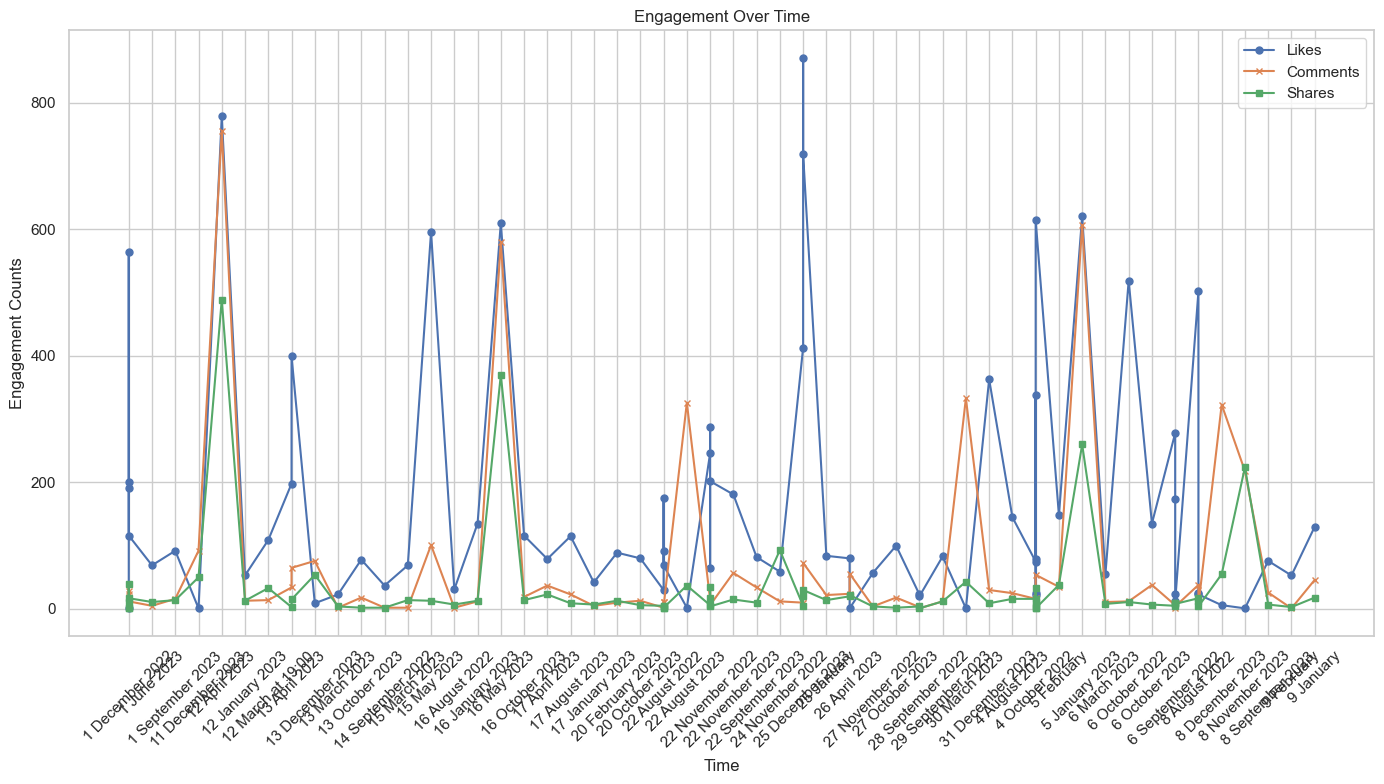

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Ensure the data is sorted by Time
data_sorted = df.sort_values('Time')

# Plotting the engagement over time
plt.figure(figsize=(14, 8))

# Plot likes
plt.plot(data_sorted['Time'], data_sorted['Like Num'], label='Likes', marker='o', linestyle='-', markersize=5)
# Plot comments
plt.plot(data_sorted['Time'], data_sorted['Comment Num'], label='Comments', marker='x', linestyle='-', markersize=5)
# Plot shares
plt.plot(data_sorted['Time'], data_sorted['Share Num'], label='Shares', marker='s', linestyle='-', markersize=5)

plt.title('Engagement Over Time')
plt.xlabel('Time')
plt.ylabel('Engagement Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**The plot shows the trends of likes, comments, and shares over time across the dataset. Here are a few observations you might make:**
- Trends and Patterns: Look for any clear trends, such as periods of increased engagement or notable spikes.
- Seasonality: Determine if there's any seasonal pattern, like more engagement during specific months or times of the year.
- Comparing Metrics: Assess how the different types of engagement (likes, comments, shares) correlate with each other over time.

In [14]:
# Extract the day of the week from 'Time' column (Monday=0, Sunday=6)
data_sorted['Day of Week'] = data_sorted['Time'].dt.dayofweek

# Aggregate likes, comments, and shares by day of the week
engagement_by_day = data_sorted.groupby('Day of Week')[['Like Num', 'Comment Num', 'Share Num']].mean()

# Plotting
plt.figure(figsize=(10, 6))
engagement_by_day.plot(kind='bar', ax=plt.gca())
plt.title('Average Engagement by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.legend(['Likes', 'Comments', 'Shares'])
plt.tight_layout()

plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

To dive deeper into your dataset through Exploratory Data Analysis (EDA), consider these advanced approaches:

### 1. **Temporal Analysis**
- **Engagement Over Time**: Plot the trend of likes, comments, and shares over time. This can reveal patterns such as increased engagement during specific periods.
- **Day/Week Analysis**: If you manage to parse the date correctly, analyzing engagement by day of the week could reveal when users are most active or engaged.

### 2. **Content Analysis**
- **Text Length vs. Engagement**: Investigate if the length of the post content correlates with engagement metrics. Sometimes, shorter or longer posts perform differently.
- **Keyword Analysis**: Identify frequently occurring words or phrases within your posts. This could help in understanding the topics that drive engagement.
- **Sentiment Analysis**: Analyzing the sentiment of the post content and correlating it with engagement metrics might reveal if positive, negative, or neutral tones affect user interactions.

### 3. **Engagement Analysis**
- **Correlation Matrix**: A correlation matrix of likes, comments, and shares can help identify relationships between these variables. For instance, posts with a high number of likes might also have more comments and shares.
- **High-Performance Posts**: Identify characteristics of posts with high engagement metrics. This could involve a combination of factors such as posting time, content length, and keywords used.

### 4. **Visualization Techniques**
- **Heatmaps**: Useful for visualizing the correlation matrix or engagement metrics by time (e.g., hour of day, day of week).
- **Time Series Plots**: Plotting engagement metrics over time can help identify trends and patterns.
- **Bar Charts and Histograms**: Use these for categorical data analysis, such as posts per month or engagement level categories.

### 5. **Cluster Analysis**
- **Segmentation**: Use clustering techniques (e.g., K-means) to group posts into clusters based on their engagement metrics and content features. This could reveal distinct types of posts within your dataset.

### 6. **Advanced Text Analysis**
- **Topic Modeling**: Apply models like LDA (Latent Dirichlet Allocation) to categorize posts into topics automatically. This can help understand the main themes driving engagement.
- **NLP Techniques**: Use advanced NLP techniques like named entity recognition or part-of-speech tagging to analyze the structure of your post content.

### 7. **Predictive Modeling**
- **Engagement Prediction**: Use regression models to predict engagement metrics based on features extracted from your data. This could help in planning future content strategies.

### 8. **Anomaly Detection**
- **Detecting Outliers**: Identify posts with unusually high or low engagement to explore what made them stand out. This might help in identifying successful strategies or content types.

Each of these approaches can offer insights into different aspects of your data, helping to inform content strategy, understand audience engagement, and optimize future posts. Depending on your specific interests or questions, some approaches may be more relevant than others. 

How would you like to proceed with these EDA directions?